In [4]:
import os
import shutil
import random

# Base directory
base_dir = "/Users/umangshikarvar/Desktop/SRIP task/"
dataset_dir = os.path.join(base_dir, "Dataset")
images_dir = os.path.join(dataset_dir, "images")
labels_dir = os.path.join(dataset_dir, "labels")

# Output directories (outside Dataset/)
output_dirs = {
    "train": (os.path.join(base_dir, "train/images"), os.path.join(base_dir, "train/labels")),
    "val": (os.path.join(base_dir, "val/images"), os.path.join(base_dir, "val/labels")),
    "test": (os.path.join(base_dir, "test/images"), os.path.join(base_dir, "test/labels"))
}

# Create output directories
for split in output_dirs.values():
    os.makedirs(split[0], exist_ok=True)
    os.makedirs(split[1], exist_ok=True)

# List all labels (.txt files)
label_files = sorted([f for f in os.listdir(labels_dir) if f.endswith('.txt')])
random.shuffle(label_files)  # Shuffle for randomness

# Split indices
num_labels = len(label_files)
train_end = int(0.72 * num_labels)
val_end = train_end + int(0.08 * num_labels)

train_files = label_files[:train_end]
val_files = label_files[train_end:val_end]
test_files = label_files[val_end:]

# Function to copy files
def copy_files(file_list, split):
    img_dest, lbl_dest = output_dirs[split]
    for lbl_file in file_list:
        lbl_path = os.path.join(labels_dir, lbl_file)
        
        # Find corresponding image file (.tif or .tiff)
        img_file = lbl_file.replace('.txt', '.tif')
        img_path = os.path.join(images_dir, img_file)
        if not os.path.exists(img_path):  # Try .tiff extension if .tif is not found
            img_file = lbl_file.replace('.txt', '.tiff')
            img_path = os.path.join(images_dir, img_file)

        # Copy label and image if both exist
        if os.path.exists(lbl_path):
            shutil.copy2(lbl_path, os.path.join(lbl_dest, lbl_file))
        if os.path.exists(img_path):
            shutil.copy2(img_path, os.path.join(img_dest, img_file))

# Copy files
copy_files(train_files, "train")
copy_files(val_files, "val")
copy_files(test_files, "test")

print(f"Dataset split completed: Train: {len(train_files)}, Val: {len(val_files)}, Test: {len(test_files)}")

Dataset split completed: Train: 1830, Val: 203, Test: 509


In [ ]:
import torch
device=torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

from ultralytics import YOLO

# Load the YOLO11m-OBB model
model = YOLO("yolov8m.pt")  # Load pre-trained model

# Train the model with custom parameters
model.train(
    data="/Users/umangshikarvar/Desktop/SRIP task/train.yaml",
    epochs=100,
    imgsz=416,
    batch=400,
    iou=0.33,
    conf=0.001,
    device=device,
    val=True  # Disables validation
)
# Save the trained model as model.pt
model.save("Model.pt")

New https://pypi.org/project/ultralytics/8.3.75 available 😃 Update with 'pip install -U ultralytics'
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/home/umang.shikarvar/Punjab-WB/YOLO/train.yaml, epochs=100, time=None, patience=100, batch=400, imgsz=416, save=True, save_period=-1, cache=False, device=cuda:1, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=0.001, iou=0.33, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False

train: Scanning /home/umang.shikarvar/Punjab-WB/YOLO/train/labels.cache... 1830 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1830/1830 [00:00<?, ?it/s]
val: Scanning /home/umang.shikarvar/Punjab-WB/YOLO/val/labels.cache... 203 images, 0 backgrounds, 0 corrupt: 100%|██████████| 203/203 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.003125), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100         0G      3.057      5.365      2.203       4250        416: 100%|██████████| 5/5 [00:06<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.88s/it]

                   all        203       2212    0.00145     0.0667    0.00119   0.000327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100         0G      3.091      5.384      2.208       3950        416: 100%|██████████| 5/5 [00:07<00:00,  1.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.32s/it]

                   all        203       2212     0.0414     0.0298     0.0171    0.00661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100         0G      1.804      2.591      1.348       4109        416: 100%|██████████| 5/5 [00:05<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.94s/it]

                   all        203       2212      0.521      0.176      0.156     0.0926



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100         0G      1.333      1.059      1.102       3967        416: 100%|██████████| 5/5 [00:06<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.10s/it]

                   all        203       2212      0.238       0.22      0.237      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100         0G      1.251     0.8895      1.045       3865        416: 100%|██████████| 5/5 [00:07<00:00,  1.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.67s/it]

                   all        203       2212      0.255      0.244      0.257      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100         0G      1.172     0.7851      1.008       3759        416: 100%|██████████| 5/5 [00:05<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.07it/s]

                   all        203       2212      0.582      0.225      0.231      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100         0G      1.101      0.699     0.9818       3761        416: 100%|██████████| 5/5 [00:05<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.37it/s]

                   all        203       2212      0.869      0.238      0.177      0.114



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100         0G      1.069     0.6532     0.9761       4399        416: 100%|██████████| 5/5 [00:05<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.44it/s]

                   all        203       2212      0.588      0.238      0.242      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100         0G      1.042     0.6445     0.9616       3627        416: 100%|██████████| 5/5 [00:05<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.14s/it]

                   all        203       2212      0.257      0.237      0.249      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100         0G       1.01     0.6126     0.9498       3640        416: 100%|██████████| 5/5 [00:08<00:00,  1.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.05s/it]

                   all        203       2212      0.293      0.292       0.23      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100         0G      1.013     0.6167     0.9506       3789        416: 100%|██████████| 5/5 [00:05<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.47it/s]

                   all        203       2212      0.451      0.291      0.294      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100         0G     0.9882     0.5829     0.9432       3685        416: 100%|██████████| 5/5 [00:05<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.45it/s]

                   all        203       2212      0.309      0.338      0.279      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100         0G      0.989     0.5714     0.9463       3425        416: 100%|██████████| 5/5 [00:05<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.40s/it]

                   all        203       2212      0.557      0.246      0.213      0.137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100         0G     0.9839       0.58      0.943       4236        416: 100%|██████████| 5/5 [00:06<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.01s/it]

                   all        203       2212      0.184      0.304      0.206      0.127



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100         0G     0.9948     0.5835     0.9464       3424        416: 100%|██████████| 5/5 [00:05<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.45it/s]

                   all        203       2212      0.424      0.349      0.379      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100         0G     0.9861     0.5719     0.9472       3813        416: 100%|██████████| 5/5 [00:05<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.51it/s]

                   all        203       2212      0.503      0.474      0.459      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100         0G     0.9519     0.5525     0.9371       3957        416: 100%|██████████| 5/5 [00:05<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.16s/it]

                   all        203       2212      0.616      0.426      0.456      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100         0G     0.9321     0.5491     0.9307       4066        416: 100%|██████████| 5/5 [00:05<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.51it/s]

                   all        203       2212      0.898      0.325      0.332      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100         0G     0.9105     0.5233      0.924       3554        416: 100%|██████████| 5/5 [00:07<00:00,  1.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.22s/it]

                   all        203       2212      0.495      0.349      0.368      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100         0G     0.9549     0.5433     0.9411       4109        416: 100%|██████████| 5/5 [00:06<00:00,  1.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.48it/s]

                   all        203       2212      0.933      0.251      0.308      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100         0G     0.9604     0.5451     0.9301       3406        416: 100%|██████████| 5/5 [00:05<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.19s/it]

                   all        203       2212      0.936      0.262      0.284      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100         0G     0.9545     0.5407     0.9363       3941        416: 100%|██████████| 5/5 [00:05<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.53it/s]

                   all        203       2212      0.423      0.419      0.383      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100         0G     0.8828     0.5083     0.9208       4100        416: 100%|██████████| 5/5 [00:05<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.56it/s]

                   all        203       2212      0.805      0.442      0.489      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100         0G     0.8925     0.5155     0.9171       3807        416: 100%|██████████| 5/5 [00:06<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.08s/it]

                   all        203       2212      0.564      0.376      0.302      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100         0G     0.9779     0.5466     0.9352       3339        416: 100%|██████████| 5/5 [00:06<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.16s/it]

                   all        203       2212      0.633      0.442      0.473      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100         0G     0.9196     0.5162     0.9247       3913        416: 100%|██████████| 5/5 [00:05<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.58it/s]

                   all        203       2212      0.933      0.396      0.485      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100         0G     0.8855     0.5084     0.9164       4375        416: 100%|██████████| 5/5 [00:05<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.57it/s]

                   all        203       2212      0.459      0.423      0.429      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100         0G     0.8424     0.4832     0.9061       3925        416: 100%|██████████| 5/5 [00:05<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.00it/s]

                   all        203       2212      0.807      0.521      0.544      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100         0G     0.8514     0.4814     0.9063       4219        416: 100%|██████████| 5/5 [00:05<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.56it/s]

                   all        203       2212       0.83      0.533      0.596      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100         0G     0.8167     0.4657     0.9014       4425        416: 100%|██████████| 5/5 [00:07<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.03s/it]

                   all        203       2212      0.766      0.533      0.567      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100         0G     0.7993     0.4598     0.8939       4346        416: 100%|██████████| 5/5 [00:05<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.57it/s]

                   all        203       2212      0.872      0.674      0.724      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100         0G     0.8022     0.4643     0.8938       3893        416: 100%|██████████| 5/5 [00:05<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.58it/s]

                   all        203       2212       0.85      0.649      0.726      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100         0G     0.7642     0.4469     0.8869       3347        416: 100%|██████████| 5/5 [00:06<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.57it/s]

                   all        203       2212      0.797      0.741      0.809      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100         0G     0.7417     0.4338     0.8897       3633        416: 100%|██████████| 5/5 [00:05<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.58it/s]

                   all        203       2212       0.92       0.71      0.779      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100         0G     0.7496     0.4252       0.88       4180        416: 100%|██████████| 5/5 [00:08<00:00,  1.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.07s/it]

                   all        203       2212       0.87      0.662      0.712      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100         0G      0.751     0.4362     0.8846       4335        416: 100%|██████████| 5/5 [00:06<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.55it/s]

                   all        203       2212      0.846      0.778      0.838      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100         0G     0.7634     0.4307     0.8782       4415        416: 100%|██████████| 5/5 [00:06<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.02s/it]

                   all        203       2212      0.903      0.772      0.813      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100         0G     0.7292     0.4198     0.8745       3329        416: 100%|██████████| 5/5 [00:05<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.51it/s]

                   all        203       2212      0.925      0.799      0.872       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100         0G     0.7119     0.4111     0.8729       3457        416: 100%|██████████| 5/5 [00:05<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.13s/it]

                   all        203       2212      0.885      0.831      0.883      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100         0G     0.7144     0.4108     0.8723       3757        416: 100%|██████████| 5/5 [00:05<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.10s/it]

                   all        203       2212      0.912      0.853      0.891      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100         0G     0.7019     0.4101     0.8739       4159        416: 100%|██████████| 5/5 [00:06<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.31s/it]

                   all        203       2212      0.926      0.785       0.86      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100         0G     0.7215     0.4105     0.8769       3956        416: 100%|██████████| 5/5 [00:05<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.17it/s]

                   all        203       2212       0.94      0.745      0.863      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100         0G     0.6967     0.4059     0.8734       3687        416: 100%|██████████| 5/5 [00:05<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.18s/it]

                   all        203       2212      0.925      0.827      0.902      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100         0G     0.7012     0.4049     0.8715       3364        416: 100%|██████████| 5/5 [00:05<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.58it/s]

                   all        203       2212      0.939      0.832      0.882      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100         0G     0.6686      0.388     0.8654       4245        416: 100%|██████████| 5/5 [00:05<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.52it/s]

                   all        203       2212      0.984      0.814      0.901      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100         0G     0.6348      0.381     0.8609       3870        416: 100%|██████████| 5/5 [00:07<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.83s/it]

                   all        203       2212       0.89      0.846      0.883      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100         0G     0.6738     0.3894     0.8638       3662        416: 100%|██████████| 5/5 [00:05<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.15s/it]

                   all        203       2212      0.925      0.735      0.795      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100         0G     0.6566     0.3885     0.8632       3915        416: 100%|██████████| 5/5 [00:05<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.62it/s]

                   all        203       2212      0.894      0.814      0.882      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100         0G     0.6437     0.3844     0.8627       3901        416: 100%|██████████| 5/5 [00:05<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.57it/s]

                   all        203       2212      0.979        0.8      0.892      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100         0G     0.6223     0.3724     0.8575       3230        416: 100%|██████████| 5/5 [00:05<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.14it/s]

                   all        203       2212      0.888      0.836      0.873      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100         0G     0.6243     0.3742     0.8579       3359        416: 100%|██████████| 5/5 [00:07<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.12s/it]

                   all        203       2212      0.916      0.822      0.881      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100         0G     0.6435     0.3869       0.86       4072        416: 100%|██████████| 5/5 [00:06<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.13s/it]

                   all        203       2212      0.925      0.841      0.872      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100         0G     0.6134      0.367     0.8564       3340        416: 100%|██████████| 5/5 [00:05<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.58it/s]

                   all        203       2212      0.928      0.832      0.895       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100         0G     0.6182     0.3704     0.8538       3981        416: 100%|██████████| 5/5 [00:05<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.39it/s]

                   all        203       2212      0.933      0.822      0.893      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100         0G     0.6207     0.3706     0.8579       3583        416: 100%|██████████| 5/5 [00:05<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.02s/it]

                   all        203       2212      0.948      0.797      0.883      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100         0G     0.6096     0.3693     0.8541       3627        416: 100%|██████████| 5/5 [00:06<00:00,  1.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.18s/it]

                   all        203       2212      0.889      0.815      0.863      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100         0G      0.602     0.3668     0.8541       4358        416: 100%|██████████| 5/5 [00:06<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.12s/it]

                   all        203       2212      0.969      0.829      0.912      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100         0G     0.5959     0.3588     0.8548       3735        416: 100%|██████████| 5/5 [00:06<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.52it/s]

                   all        203       2212      0.956      0.854       0.92      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100         0G     0.5781     0.3499     0.8479       3507        416: 100%|██████████| 5/5 [00:05<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.58it/s]

                   all        203       2212      0.983      0.883      0.908      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100         0G     0.6018      0.355     0.8514       3527        416: 100%|██████████| 5/5 [00:06<00:00,  1.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.01it/s]

                   all        203       2212      0.974      0.842       0.91      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100         0G     0.5724     0.3455     0.8447       4122        416: 100%|██████████| 5/5 [00:05<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.58it/s]

                   all        203       2212      0.969      0.865      0.928      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100         0G     0.5761     0.3466     0.8448       3753        416: 100%|██████████| 5/5 [00:06<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.15s/it]

                   all        203       2212      0.895      0.904      0.923      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100         0G     0.5533     0.3372     0.8412       3526        416: 100%|██████████| 5/5 [00:06<00:00,  1.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.15s/it]

                   all        203       2212      0.961      0.896      0.928      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100         0G     0.5407     0.3343      0.844       4188        416: 100%|██████████| 5/5 [00:05<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.58it/s]

                   all        203       2212      0.934      0.899      0.928      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100         0G     0.5658     0.3429     0.8459       3856        416: 100%|██████████| 5/5 [00:06<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.02s/it]

                   all        203       2212      0.977      0.834      0.912      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100         0G     0.5544     0.3364     0.8436       3619        416: 100%|██████████| 5/5 [00:05<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.57it/s]

                   all        203       2212      0.964      0.858        0.9      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100         0G     0.5601     0.3403     0.8435       3523        416: 100%|██████████| 5/5 [00:05<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.54it/s]

                   all        203       2212      0.971      0.816      0.906      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100         0G      0.549      0.334     0.8407       3463        416: 100%|██████████| 5/5 [00:06<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.14s/it]

                   all        203       2212      0.977      0.847      0.922      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100         0G      0.551     0.3351     0.8415       4123        416: 100%|██████████| 5/5 [00:06<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.19s/it]

                   all        203       2212      0.978      0.845      0.917      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100         0G     0.5401     0.3307     0.8423       4322        416: 100%|██████████| 5/5 [00:06<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.56it/s]

                   all        203       2212      0.985      0.836      0.919        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100         0G     0.5391     0.3285     0.8401       3816        416: 100%|██████████| 5/5 [00:05<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.57it/s]

                   all        203       2212      0.979      0.834      0.918      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100         0G     0.5475     0.3319       0.84       3932        416: 100%|██████████| 5/5 [00:05<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.56it/s]

                   all        203       2212      0.978      0.831      0.925      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100         0G     0.5129     0.3222     0.8373       4173        416: 100%|██████████| 5/5 [00:06<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.04s/it]

                   all        203       2212      0.944      0.879      0.931       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100         0G     0.4915     0.3109     0.8317       3995        416: 100%|██████████| 5/5 [00:08<00:00,  1.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.91s/it]

                   all        203       2212      0.979      0.844      0.919      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100         0G     0.5063     0.3191     0.8368       3621        416: 100%|██████████| 5/5 [00:05<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.22it/s]

                   all        203       2212      0.937      0.886       0.92      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100         0G     0.5011     0.3179     0.8357       3971        416: 100%|██████████| 5/5 [00:05<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.56it/s]

                   all        203       2212      0.943      0.882      0.919      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100         0G     0.4897     0.3105     0.8335       3121        416: 100%|██████████| 5/5 [00:05<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.55it/s]

                   all        203       2212      0.971      0.898      0.924      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100         0G     0.4863      0.313     0.8347       3754        416: 100%|██████████| 5/5 [00:05<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.74s/it]

                   all        203       2212      0.953      0.905      0.926      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100         0G     0.4758     0.3064     0.8334       3557        416: 100%|██████████| 5/5 [00:07<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.18s/it]

                   all        203       2212       0.95      0.873      0.924      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100         0G     0.4739     0.3058     0.8312       3366        416: 100%|██████████| 5/5 [00:05<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.55it/s]

                   all        203       2212       0.96        0.9      0.932       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100         0G     0.4694     0.3034     0.8297       3855        416: 100%|██████████| 5/5 [00:05<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.59it/s]

                   all        203       2212      0.955      0.903      0.937      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100         0G     0.4925     0.3124      0.834       4051        416: 100%|██████████| 5/5 [00:05<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.58it/s]

                   all        203       2212      0.993      0.894      0.933      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100         0G     0.4717     0.3044     0.8294       3912        416: 100%|██████████| 5/5 [00:06<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.16it/s]

                   all        203       2212       0.99      0.901      0.935      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100         0G     0.4566     0.2964     0.8264       3843        416: 100%|██████████| 5/5 [00:06<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.14s/it]

                   all        203       2212      0.977      0.883      0.926      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100         0G     0.4757     0.3025     0.8302       3297        416: 100%|██████████| 5/5 [00:06<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.14s/it]

                   all        203       2212      0.973      0.875      0.924      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100         0G     0.4649     0.3004     0.8292       3982        416: 100%|██████████| 5/5 [00:05<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.58it/s]

                   all        203       2212      0.985      0.871      0.926      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100         0G     0.4516     0.2949     0.8266       3936        416: 100%|██████████| 5/5 [00:06<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.22s/it]

                   all        203       2212      0.977      0.884      0.926      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100         0G     0.4448     0.2904      0.824       3691        416: 100%|██████████| 5/5 [00:06<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.02s/it]

                   all        203       2212      0.969      0.879      0.925      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100         0G     0.4414     0.2898      0.825       3880        416: 100%|██████████| 5/5 [00:05<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.04s/it]

                   all        203       2212      0.977      0.896      0.929      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100         0G     0.4426     0.2889     0.8244       3412        416: 100%|██████████| 5/5 [00:06<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.14s/it]

                   all        203       2212      0.968      0.903      0.929      0.791


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100         0G     0.4196     0.2775     0.8098       2572        416: 100%|██████████| 5/5 [00:07<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.08s/it]

                   all        203       2212      0.972      0.899      0.937      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100         0G     0.3816      0.259     0.8069       2828        416: 100%|██████████| 5/5 [00:05<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.06it/s]

                   all        203       2212      0.979       0.88      0.935      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100         0G     0.3832     0.2565     0.8063       2419        416: 100%|██████████| 5/5 [00:05<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.57it/s]

                   all        203       2212      0.968        0.9      0.937        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100         0G     0.3551     0.2461     0.8015       2734        416: 100%|██████████| 5/5 [00:05<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.57it/s]

                   all        203       2212      0.969      0.903      0.937      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100         0G     0.3641     0.2498     0.8027       2732        416: 100%|██████████| 5/5 [00:05<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.02it/s]

                   all        203       2212      0.973      0.903      0.936      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100         0G     0.3527     0.2442     0.8015       2336        416: 100%|██████████| 5/5 [00:06<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.98s/it]

                   all        203       2212      0.994      0.896      0.938      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100         0G      0.339     0.2403     0.7999       2467        416: 100%|██████████| 5/5 [00:05<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.03it/s]

                   all        203       2212      0.991      0.896       0.94      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100         0G     0.3428     0.2418     0.8021       2198        416: 100%|██████████| 5/5 [00:05<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.48it/s]

                   all        203       2212      0.968      0.903       0.94      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100         0G     0.3361     0.2396     0.7995       2779        416: 100%|██████████| 5/5 [00:05<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.53it/s]

                   all        203       2212      0.971      0.902       0.94      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100         0G      0.336     0.2382     0.7984       2268        416: 100%|██████████| 5/5 [00:05<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.56it/s]

                   all        203       2212      0.973      0.902       0.94      0.821



100 epochs completed in 0.254 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/train/weights/best.pt, 52.0MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.70 🚀 Python-3.11.7 torch-2.5.1+cu124 CUDA:1 (NVIDIA A100-SXM4-80GB, 81156MiB)
Model summary (fused): 218 layers, 25,841,497 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:17<00:00, 17.85s/it]


                   all        203       2212      0.972        0.9      0.938       0.82
               class_0        202       2177       0.99      0.937      0.968      0.889
               class_1         14         20      0.947      0.896      0.924      0.777
               class_2         15         15      0.979      0.867      0.921      0.795
Speed: 0.1ms preprocess, 1.7ms inference, 0.0ms loss, 10.4ms postprocess per image
Results saved to runs/detect/train



image 1/1 /Users/umangshikarvar/Desktop/SRIP task/test/images/solarpanels_native_2__x0_9358_y0_3629_dxdy_416.tif: 416x416 9 class_0s, 153.1ms
Speed: 0.6ms preprocess, 153.1ms inference, 0.4ms postprocess per image at shape (1, 3, 416, 416)


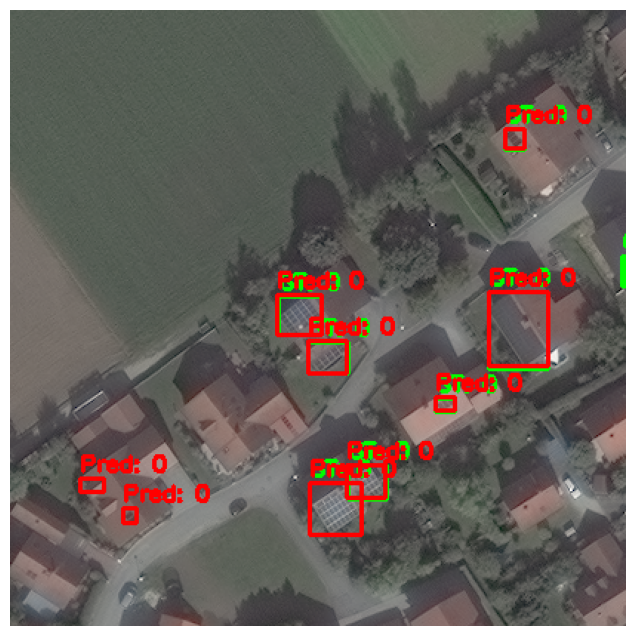

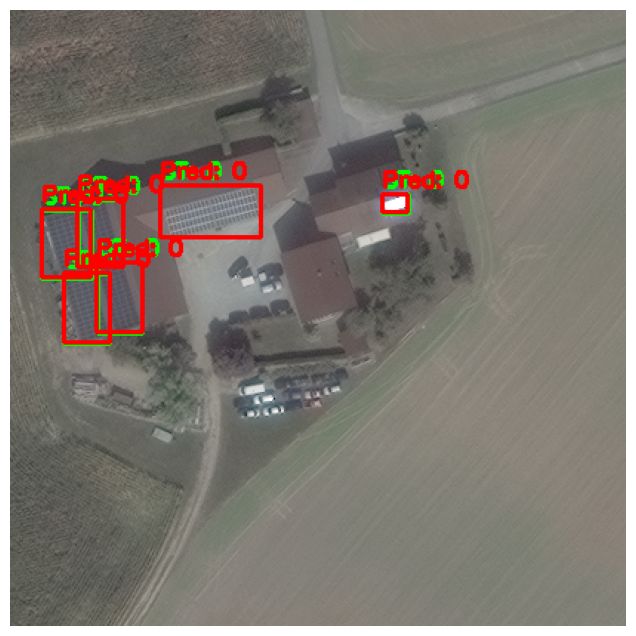

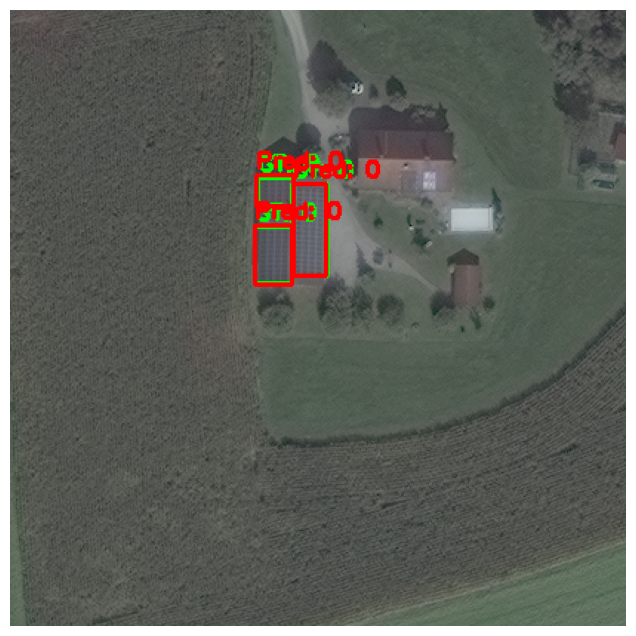

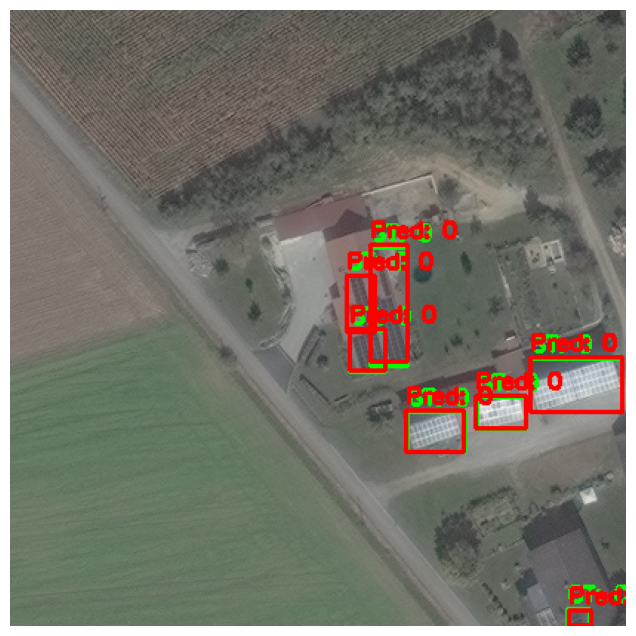

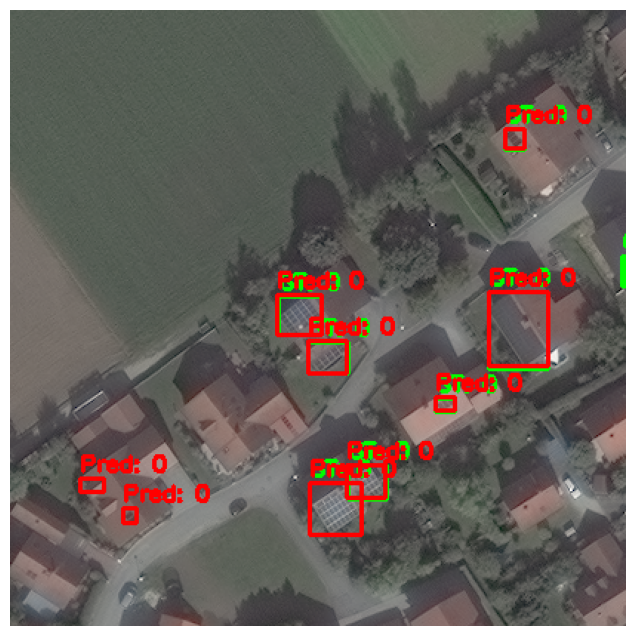

In [1]:
import os
import glob
import cv2
import numpy as np
import torch
import matplotlib.pyplot as plt
from ultralytics import YOLO
from IPython.display import display, clear_output

# Define test directory paths
test_dir = "/Users/umangshikarvar/Desktop/SRIP task/test"
image_dir = os.path.join(test_dir, "images")
label_dir = os.path.join(test_dir, "labels")

# Load YOLO model
model = YOLO("/Users/umangshikarvar/Desktop/SRIP task/Model.pt")

# Get all label files
label_paths = glob.glob(os.path.join(label_dir, "*.txt"))

if len(label_paths) < 4:
    raise ValueError(f"Not enough label files found. Found {len(label_paths)}, need at least 4.")

# Select 4 random labels and get corresponding images
selected_labels = np.random.choice(label_paths, 4, replace=False)
selected_images = [os.path.join(image_dir, os.path.basename(lbl).replace(".txt", ".tif")) for lbl in selected_labels]

# Function to load YOLO ground truth labels
def load_ground_truth(label_path, img_w, img_h):
    with open(label_path, "r") as f:
        lines = f.readlines()
    boxes = []
    for line in lines:
        values = list(map(float, line.strip().split()))
        class_id, x, y, w, h = values
        x1, y1 = int((x - w / 2) * img_w), int((y - h / 2) * img_h)
        x2, y2 = int((x + w / 2) * img_w), int((y + h / 2) * img_h)
        boxes.append((class_id, x1, y1, x2, y2))
    return boxes

# Function to visualize image with bounding boxes in Jupyter cell output
def visualize_image(image_path, label_path, model):
    clear_output(wait=True)  # Clear previous output for a dynamic update
    
    # Load image
    image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
    
    if image is None:
        print(f"Error: Could not load image {image_path}")
        return
    
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    h, w = image.shape[:2]

    # Load ground truth boxes
    gt_boxes = load_ground_truth(label_path, w, h)

    # Predict with YOLO
    results = model(image_path)
    pred_boxes = results[0].boxes.xywhn.cpu().numpy() if results[0].boxes else np.array([])
    pred_classes = results[0].boxes.cls.cpu().numpy() if results[0].boxes else np.array([])

    # Draw ground truth boxes (Green)
    for class_id, x1, y1, x2, y2 in gt_boxes:
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(image, f"GT: {int(class_id)}", (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Draw predicted boxes (Red)
    for i in range(len(pred_boxes)):
        x, y, w, h = pred_boxes[i]
        x1, y1 = int((x - w / 2) * image.shape[1]), int((y - h / 2) * image.shape[0])
        x2, y2 = int((x + w / 2) * image.shape[1]), int((y + h / 2) * image.shape[0])
        cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)
        cv2.putText(image, f"Pred: {int(pred_classes[i])}", (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    # Show image using Matplotlib in Jupyter
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(image)
    ax.axis("off")  # Hide axes
    display(fig)  # Display in Jupyter Notebook output cell

# Run visualization for selected samples
for img_path, lbl_path in zip(selected_images, selected_labels):
    visualize_image(img_path, lbl_path, model)